# Project Title: 
Store Sales - Time Series Forecasting
by Edina Balazs

# Business Understanding

This challenge is designed to evaluate your technical skills, problem-solving abilities, and proficiency in developing and deploying AI-driven solutions. You will be tasked with creating a Machine Learning API for Time Series Forecasting.
## Description

Your task is to develop an application that uses machine learning to provide time series forecasting. You will start with exploratory data analysis, proceed to model selection and feature engineering, evaluate your model, and then deploy it as a FastAPI application. The final application should be containerized using Docker.

The dataset you will be working with is provided in the `data` folder, accompanied by a `dataset_description.md` file that describes the dataset in detail. The target variable is `sales`, and you have access to several features that may help you build a predictive model. The dataset is a time series, and you will be tasked with forecasting the sales for a given date and store. 

The project uses `poetry` as a package manager, however you are free to use whichever package manager you are comfortable with.

*As a stretch goal you can finalize the app found in the `app` folder, and build a docker image*
The application is built with `FastAPI` and The application is already scaffolded so the main focus should be on the machine learning model and the API development. You would need to adjust the code minimally to be able to run properly. 

## Instructions
Steps 1-4 are *_essential_* for the deliverable, and steps 5-6 are optional stretch goals.

1. **Exploratory Data Analysis (EDA):** Begin with an exploratory data analysis to understand the dataset's characteristics, including trends, seasonality, and any outliers or anomalies.
    - Analyze dataset trends, seasonality, outliters and anomalies. 
    - Recommended tools: Pandas and Matplotlib/Seaborn.
2. **Feature Engineering:** Create and select features that will help improve your model's predictive performance.
    - Generate features to enhance model predictive performance. Consider historical sales data, time components (e.g., day of week, month), and external factors (e.g., holidays).
    - There are no strict limits on the number or type of features, but aim for relevance and effectiveness.
3. **Model Selection:** Choose a suitable model for time series forecasting. Justify your choice.
    - Select a model suitable for time series forecasting (e.g., ARIMA, LSTM). Justify your choice based on the model's appropriateness for the data characteristics and forecasting goals.
    - Criteria for justification: accuracy, computational efficiency, and ease of interpretation.
    - Note: think about creating a *baseline* model to compare your model's performance.
4. **Model Training and Evaluation:** Train your model and evaluate its performance using appropriate metrics. Aim for a model that balances accuracy and efficiency.
    - Train your model and evaluate its performance using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).
    - Seek a balance between accuracy and efficiency. Explain your approach in the documentation.

#### Stretch Goals:

5. **API Development:** Develop a FastAPI application that serves your machine learning model. The API should accept input parameters relevant to your model and return a forecast.
    - Scafolding has been done for the application, you should be able to go through the applicationa and understand the structure.
    - you can find the application in the `app` folder.
    - it can be run from the root folder of the challenge using the command `uvicorn app.main:app --reload` and it should be available at `http://127.0.0.1:8000/docs`
6. **Dockerization:** Containerize your FastAPI application using Docker. Provide a Dockerfile and detailed instructions on how to build and run the container.
    - Hint: you might want to use the following command to generate `requirements.txt` file: `poetry export --without-hashes --format=requirements.txt > requirements.txt`


## Deliverables
The deliverables are split into two: essential & stretch goals.

*Essential:*
1. A Jupyter notebook containing your EDA, feature engineering, model selection, and evaluation process.*(Note: be ready to present this notebook to the team during the interview process, you can also make a presentation of the notebook if you want to.)*
2. A README.md file that includes: 
    - An overview of your solution.
    - Instructions on how to run your solution (in the case of a notebook, you can provide instructions on how to run the notebook within the notebook).


*Stretch Goals:*
1. A FastAPI application codebase, including all necessary files for running the app.
2. A Dockerfile + docker-compose.yml for containerizing your application.
3. A README.md file that includes:
   - Instructions on how to set up and run your application.

## Evaluation Criteria

Your submission will be evaluated based on:

- Code quality and organization.
- Effectiveness and creativity of your feature engineering and model selection.
- Performance of your machine learning model.
- Functionality and design of your FastAPI application.
- Completeness and clarity of your documentation.

## Submission

Please create a private Github repository with your solution, and share it with us.
- Eric Walzthöny eric.walzthony@smartassets.ai
- Andrey Nunez andrey.nunez@smartassets.ai
- Nathan Hotchkin nathan.hotchkin@smartassets.ai


# Setup

## Importation

In [1]:
# Data Handling
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px

# Statistical Analysis
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error


# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Modelling
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras_core as keras
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error 
import tensorflow
import xgboost as xgb 
from sklearn.model_selection import RandomizedSearchCV 
from keras.models import Sequential 
from keras.layers import LSTM, Dense 
from scikeras.wrappers import KerasClassifier
from keras_preprocessing.sequence import TimeseriesGenerator 
from keras.callbacks import EarlyStopping 
import pickle


# Other Packages
import warnings

warnings.filterwarnings("ignore")

Using JAX backend.


## Data Loading

### Loading the data from .csv 

In [2]:
oil_df = pd.read_csv('data/oil.csv')
holidays_events_df = pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')

### Loading the Train and Test Datasets

#### Train Dataset

In [3]:
train_df = pd.read_csv("data/train.csv")

#### Test Dataset

In [4]:
test_df = pd.read_csv("data/test.csv")

### Loading the Transactions Dataset

In [5]:
transactions_df = pd.read_csv("data/transactions.csv")

# Questions and Hypothesis

## Hypothesis

The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

Null Hypothesis (H0): The promotional activities, oil prices, and holidays/events do not have a significant impact on store sales for Corporation Favorita.

Alternative Hypothesis (H1): The promotional activities, oil prices, and holidays/events have a significant impact on store sales for Corporation Favorita.

## Questions
1. Is the train dataset complete (has all the required dates)?
2. Which dates have the lowest and highest sales for each year?
3. Analyze the impact of the earthquake on sales
4. Determine if certain groups of stores sell more products
5. Are sales affected by promotions, oil prices and holidays?
6. What analysis can we get from the date and its extractable features?
7. Are there certain product families types that exhibit higher sales performance?
8. How does the sales trend vary across different store numbers?

# Exploratory Data Analysis (EDA), Data Preprocessing & Cleaning 

## Understanding the datasets

An in-depth exploration of the datasets is presented to gain insights into the available variables,their distributions and relationships. This step will provide an initial undertanding of the datasets to identify any data quality issues that will inform the cleaning and pre-processing.

### i. Shape of The Datasets

In [6]:
# Print out the shapes of the train and test datasets
print(f"Train Dataset: {train_df.shape}")
print(f"Test Datasets: {test_df.shape}")

Train Dataset: (3000888, 6)
Test Datasets: (28512, 5)


In [7]:
# Print out the shapes of the other datasets
print("Shapes of Each Dataset:")
print(f"Holiday Events Dataset: {holidays_events_df.shape}")
print(f"Oil Dataset: {oil_df.shape}")
print(f"Stores Dataset: {stores_df.shape}")
print(f"Transactions Dataset: {transactions_df.shape}")

Shapes of Each Dataset:
Holiday Events Dataset: (350, 6)
Oil Dataset: (1218, 2)
Stores Dataset: (54, 5)
Transactions Dataset: (83488, 3)


### ii. Column Information of The Datasets

In [8]:
def show_column_info(dataset_name, dataset):
    print(f"Data types for the {dataset_name} dataset:")
    print(dataset.info())
    print('==='*14)

In [9]:
show_column_info('Train', train_df)
print()
show_column_info('Test', test_df)

Data types for the Train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

Data types for the Test dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None


- The train dataset contains 6 columns: 'id', 'date', 'store_nbr', 'family', 'sales', and 'onpromotion'.
- The test dataset contains 5 columns: 'id', 'date', 'store_nbr', 'family', and 'onpromotion'.
- Test dataset does not have the "sales" column. Need to be predicted. 

In [10]:

show_column_info('Holiday events', holidays_events_df)
print()
show_column_info('Oil', oil_df)
print()
show_column_info('Stores', stores_df)
print()
show_column_info('Transactions', transactions_df)

Data types for the Holiday events dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

Data types for the Oil dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None

Data types for the Stores dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Dat

##### The Holiday Events Dataset:
- The "date" column in the dataset is of type object, needs to be converted to a datetime data type. 

##### The Oil Dataset:
- The "date" column in the dataset is of type object, needs to be converted to a datetime data type. 
- The 'dcoilwtico' column has 1,175 non-null values compared to the entries, indicating that there are some missing values in this column.

##### The Transactions dataset:
- The "date" column in the dataset is of type object, needs to be converted to a datetime data type. 


### iii. Transforming the 'date' column to datetime format

In [11]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
holidays_events_df['date'] = pd.to_datetime(holidays_events_df['date'])
oil_df['date'] = pd.to_datetime(oil_df['date'])
transactions_df['date'] = pd.to_datetime(transactions_df['date'])

In [12]:
# Confirm the data type after transformation 
print("Train dataset:", train_df['date'].dtype)
print("Test dataset:", test_df['date'].dtype)
print("Holiday Events dataset:", holidays_events_df['date'].dtype)
print("Oil dataset:", oil_df['date'].dtype)
print("Transactions dataset:", transactions_df['date'].dtype)

Train dataset: datetime64[ns]
Test dataset: datetime64[ns]
Holiday Events dataset: datetime64[ns]
Oil dataset: datetime64[ns]
Transactions dataset: datetime64[ns]


### iv. Summary statistics of the datasets

In [13]:
# Checking for the summary statistics of the datasets 
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df}

for name, data in datasets.items():
    print(f"{name.capitalize()} dataset summary statistics:")
    print('---'*15)
    print(data.describe())
    print('==='*20)
    print()

Train dataset summary statistics:
---------------------------------------------
                 id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.000888e+06   
mean   1.500444e+06  2015-04-24 08:27:04.703088384  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.502218e+05            2014-02-26 18:00:00  1.400000e+01   
50%    1.500444e+06            2015-04-24 12:00:00  2.750000e+01   
75%    2.250665e+06            2016-06-19 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.662819e+05                            NaN  1.558579e+01   

              sales   onpromotion  
count  3.000888e+06  3.000888e+06  
mean   3.577757e+02  2.602770e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  
75%    1.958473e+02  0.000000e+00  
max    1.247170e+05  7.410000e+02  
std    1.101998e+03

### v. Checking for Missing Values in The Datasets

In [14]:
# Check for missing values in the datasets
datasets = {'train': train_df, 'test': test_df, 'holiday events': holidays_events_df, 'oil': oil_df, 'stores': stores_df, 'transactions': transactions_df, }

def show_missing_values(datasets):
    for name, data in datasets.items():
        print(f"Missing values in the {name.capitalize()} dataset:")
        print(data.isnull().sum())
        print('===' * 18)
        print()

show_missing_values(datasets)

Missing values in the Train dataset:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Missing values in the Test dataset:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Missing values in the Holiday events dataset:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Missing values in the Oil dataset:
date           0
dcoilwtico    43
dtype: int64

Missing values in the Stores dataset:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Missing values in the Transactions dataset:
date            0
store_nbr       0
transactions    0
dtype: int64



As it was expected 'dcoilwtico' column in the oil.csv dataset has 43 missing values, which is need to be filled for further analysis.

#### Handling the missing values in the oil.csv dataset.

In [15]:
# Plotting to determine filling strategy
fig = px.line(oil_df, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

##### Backward-fill strategy for missing values in the oil.csv datatset.

In [16]:
# Next known value for estimation, because forward fill will leave one value missing, since it doesn't have last know value.
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].bfill()

In [17]:
# Check for missing values
missing_values_after = oil_df['dcoilwtico'].isnull().sum()
missing_values_after

0

In [18]:
# Visualizing for confirmation
fig = px.line(oil_df, x='date', y='dcoilwtico')
fig.update_layout(title='Trend of Oil Prices Over Time', title_x=0.5, xaxis_title='Date', yaxis_title='Oil Price')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

 ### vi. Checking for the completeness of the 'date' column in the Train Dataset

In [19]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is incomplete. The following dates are missing:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [20]:
# Complete the missing dates in the train dataset
# Create an index of the missing dates as a DatetimeIndex object
missing_dates = pd.Index(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]')

# Create a DataFrame with the missing dates, using the 'date' column
missing_data = pd.DataFrame({'date': missing_dates})

# Concatenate the original train dataset and the missing data DataFrame
# ignore_index=True ensures a new index is assigned to the resulting DataFrame
train_df = pd.concat([train_df, missing_data], ignore_index=True)

# Sort the DataFrame based on the 'date' column in ascending order
train_df.sort_values('date', inplace=True)

Confirm if the train dataset is complete

In [21]:
# Check the completeness of the train dataset
min_date = train_df['date'].min()
max_date = train_df['date'].max()
expected_dates = pd.date_range(start=min_date, end=max_date)

missing_dates = expected_dates[~expected_dates.isin(train_df['date'])]

if len(missing_dates) == 0:
    print("The train dataset is complete. It includes all the required dates.")
else:
    print("The train dataset is incomplete. The following dates are missing:")
    print(missing_dates)

The train dataset is complete. It includes all the required dates.


The missing dates have been handled successfully.

### vi. Merging The Train Dataset with the Stores, Transactions, Holiday Events and Oil Dataset

In [22]:
# Merging the common columns ('store_nbr' and 'date') in the datasets using the inner merge() function
# Merge train_df with stores_df based on 'store_nbr' column
merged_df = (
    train_df.merge(stores_df, on='store_nbr', how='inner')
            .merge(transactions_df, on=['date', 'store_nbr'], how='inner')
            .merge(holidays_events_df, on='date', how='inner')
            .merge(oil_df, on='date', how='inner')
)
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14


The use of an inner merge in this time series forecasting project for corporation Favorita helps to ensure data consistency, avoid missing values, and focus on the relevant data for accurate predictions.

An inner merge type retains only the rows with matching values in the specified columns. In the context of time series forecasting, it allows us to merge datasets based on a common time index or timestamp. By performing an inner merge, we ensure that only the rows with corresponding timestamps in both datasets are included in the merged result. This is important for time series forecasting because you want to align the data from different sources based on their timestamps to build a consistent and accurate forecasting model.

With an inner merge, you eliminate any non-matching timestamps, which may not be useful for forecasting and could introduce inconsistencies in the data. By focusing on the intersection of the datasets, we can create a merged dataset that contains the necessary information for accurate time series forecasting.

In [23]:
# Check the column information of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   type_x        322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  type_y        322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

The merged dataset has two coloumns, which were originally called the same, as 'type', have been merged as 'type_x' and 'type_y'.

The type_x column from the stores dataset. Need to be renamed to be informative as store_type.
The type_y column from the holiday dataset. Need to be renamed to be informative as holiday_type

In [24]:
merged_df = merged_df.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14


In [25]:
#Summary statistics
merged_df.describe()

,id,date,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico
count,3.220470e+05,322047,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000,322047.000000
mean,1.682979e+06,2015-08-04 23:49:57.971104,26.994672,406.383452,3.727136,8.531202,1734.117840,63.636381
min,5.610000e+02,2013-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,54.000000,27.960000
25%,1.010616e+06,2014-07-23 00:00:00,13.000000,1.000000,0.000000,4.000000,1030.000000,44.880000
50%,1.842406e+06,2015-11-02 00:00:00,27.000000,19.000000,0.000000,9.000000,1409.000000,51.980000
75%,2.209556e+06,2016-05-27 00:00:00,40.000000,241.260505,1.000000,13.000000,2148.000000,94.090000
max,3.000887e+06,2017-08-15 00:00:00,54.000000,124717.000000,716.000000,17.000000,8359.000000,107.950000
std,7.862493e+05,NaN,15.595174,1246.881240,15.512095,4.713809,1050.335018,24.855753


### viii. Checking for Missing Values in The Datasets

In [26]:
# Check for missing values in the merged datasets
missing_values = merged_df.isnull().sum()
missing_values

id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
city            0
state           0
store_type      0
cluster         0
transactions    0
holiday_type    0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
dtype: int64

## Exploratory data analysis

### Univariate

#### Distribution of the 'sales':

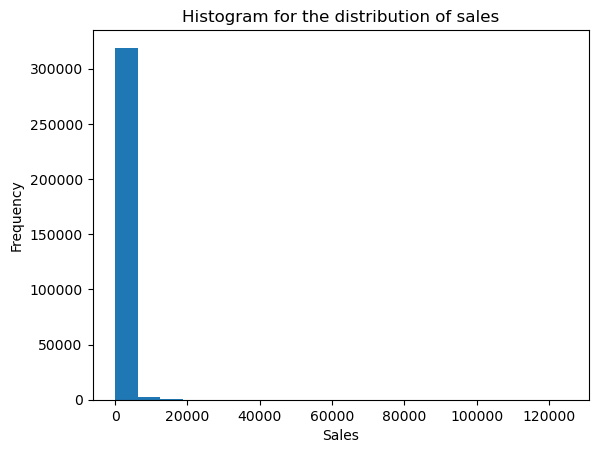

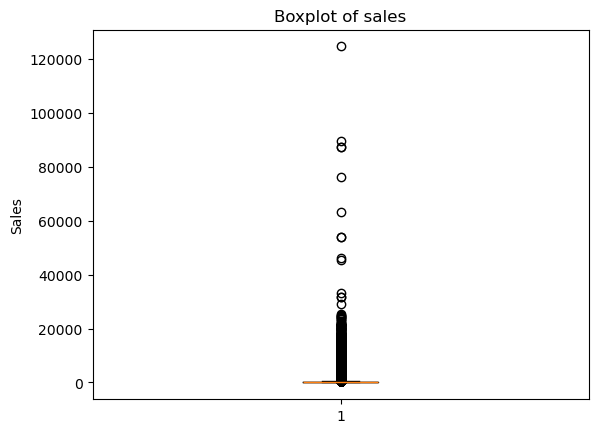

In [27]:
plt.hist(merged_df['sales'], bins=20)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram for the distribution of sales')
plt.show()

plt.boxplot(merged_df['sales'])
plt.ylabel('Sales')
plt.title('Boxplot of sales')
plt.show()

The histogram and boxplot visualization for distribution:
- right-skewed
- smaller sales values with highr frequency, higher sales values with smaller frequency

#### Distribution of the 'transactions':

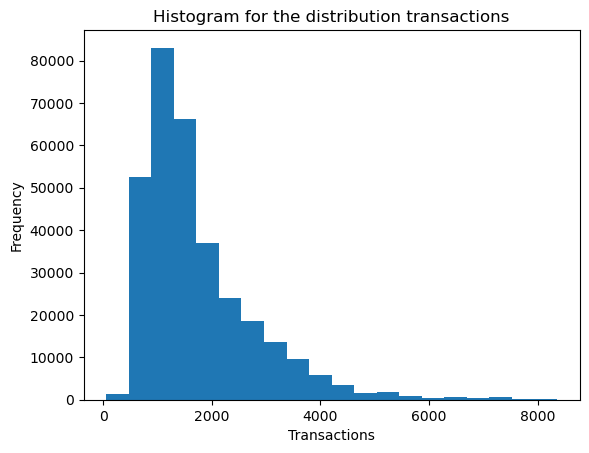

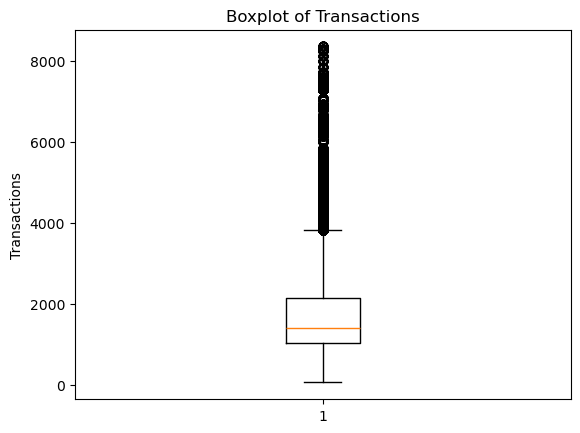

In [28]:
plt.hist(merged_df['transactions'], bins=20)
plt.xlabel('Transactions')
plt.ylabel('Frequency')
plt.title('Histogram for the distribution transactions')
plt.show()

plt.boxplot(merged_df['transactions'])
plt.ylabel('Transactions')
plt.title('Boxplot of Transactions')
plt.show()

Distribution of transactions in the dataset:
- right-skewed
- smaller sales values with higher transaction numbers, higher transaction values with smaller frequency

#### Distribution of the 'dcoilwtico', daily oil price:

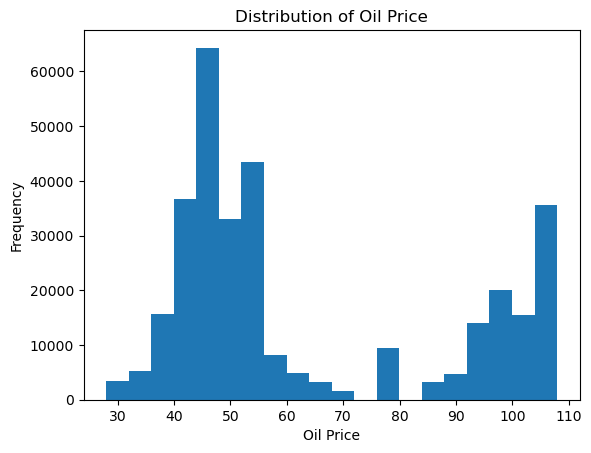

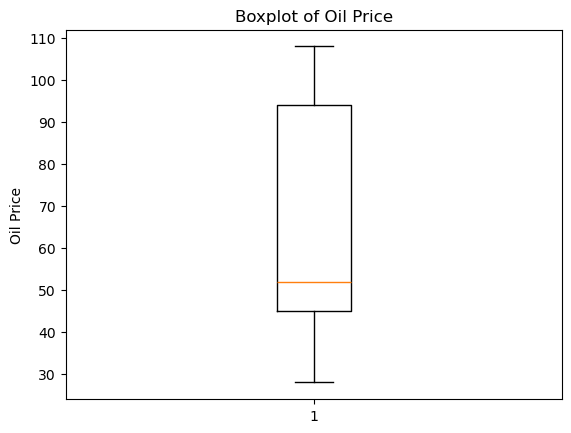

In [29]:
plt.hist(merged_df['dcoilwtico'], bins=20)
plt.xlabel('Oil Price')
plt.ylabel('Frequency')
plt.title('Distribution of Oil Price')
plt.show()

plt.boxplot(merged_df['dcoilwtico'])
plt.ylabel('Oil Price')
plt.title('Boxplot of Oil Price')
plt.show()

Containes values from the whole range. 

### Bivariate

#### Sales trends over time.

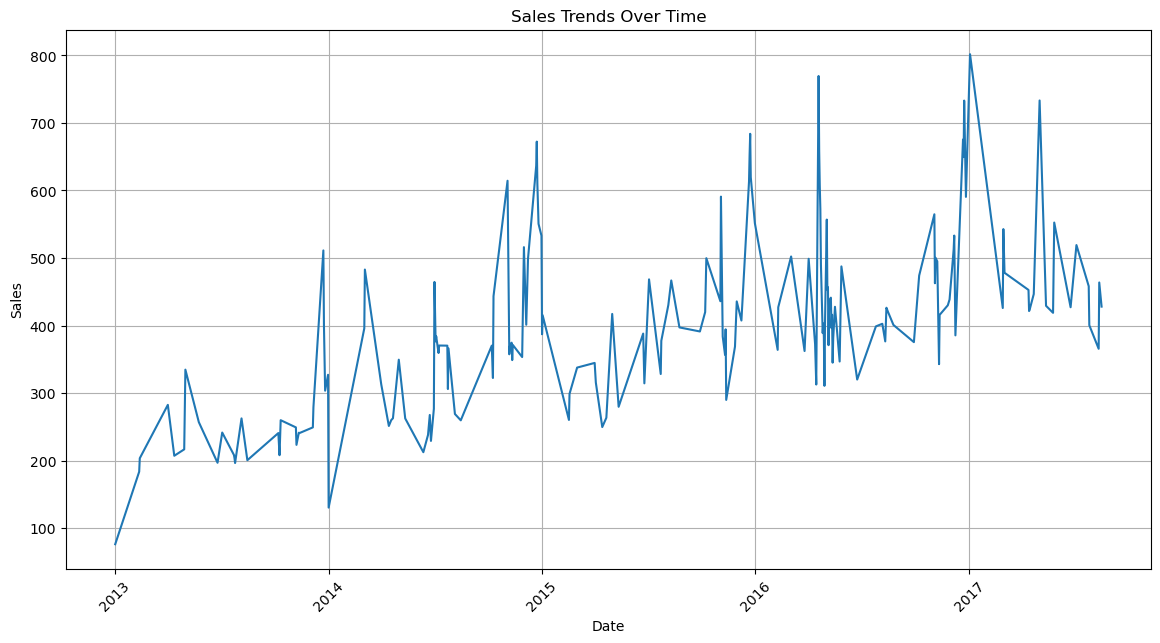

In [30]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='sales', data=merged_df, ci=None)
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Fluctuation over time, indicates that there are some effects causing periodical sales changes.

#### Oil prices trends over time

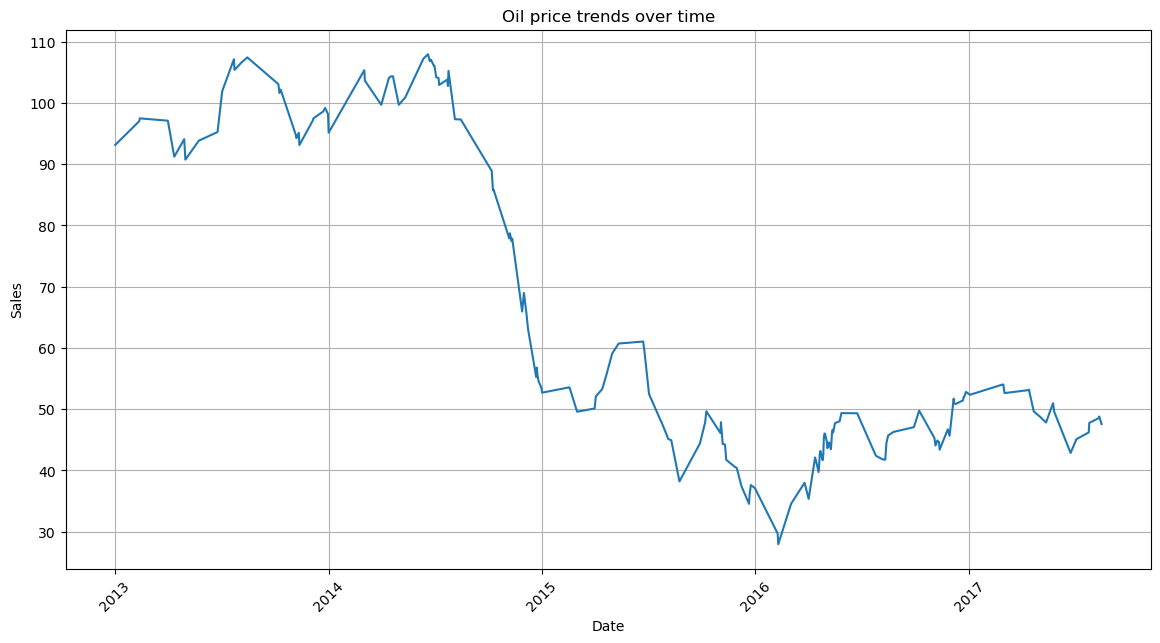

In [31]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='dcoilwtico', data=merged_df, ci=None)
plt.title('Oil price trends over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

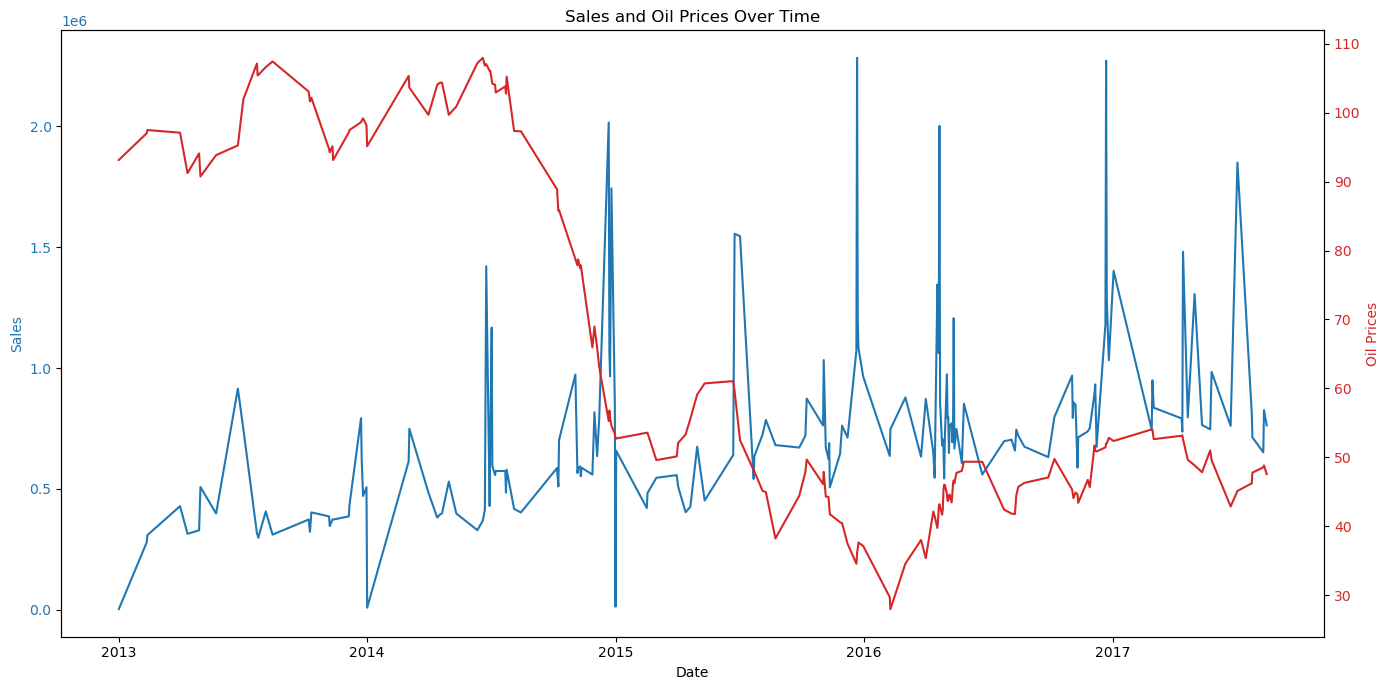

In [32]:
# Oil and Sale trends over time 
sales_agg = merged_df.groupby('date')['sales'].sum().reset_index()

# Merge the aggregated sales data with oil prices
merged_data = sales_agg.merge(oil_df, on='date', how='left')

# Plot sales and oil prices over time
plt.figure(figsize=(14, 7))
ax1 = plt.gca()

ax1.plot(merged_data['date'], merged_data['sales'], color='tab:blue', label='Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['dcoilwtico'], color='tab:red', label='Oil Prices')
ax2.set_ylabel('Oil Prices', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Sales and Oil Prices Over Time')
plt.tight_layout()
plt.show()

We can see that oil prices droped at the end of 2014, which might cause the increasing sales in the same period. At the start 2015 despite the dropping oil prices, the sales were decreasing. This show that oil prices have low relation to sales.

#### Sales by store type

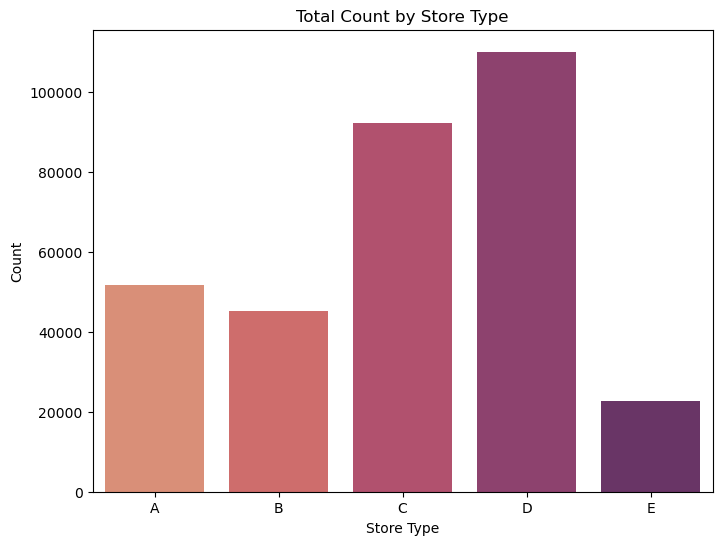

In [33]:
store_type_counts = merged_df['store_type'].value_counts().sort_index()
store_type_sales = merged_df.groupby('store_type')['sales'].sum()
palet= sns.color_palette("flare", len(store_type_counts))
plt.figure(figsize=(8, 6))
sns.barplot(x=store_type_counts.index, y=store_type_counts.values, palette=palet)
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.title('Total Count by Store Type')
plt.show()

Store Type D has the highest count of sales, Type C follows with a relatively lower count of sales, Types A, B, and E have lower counts.

#### Sales by city

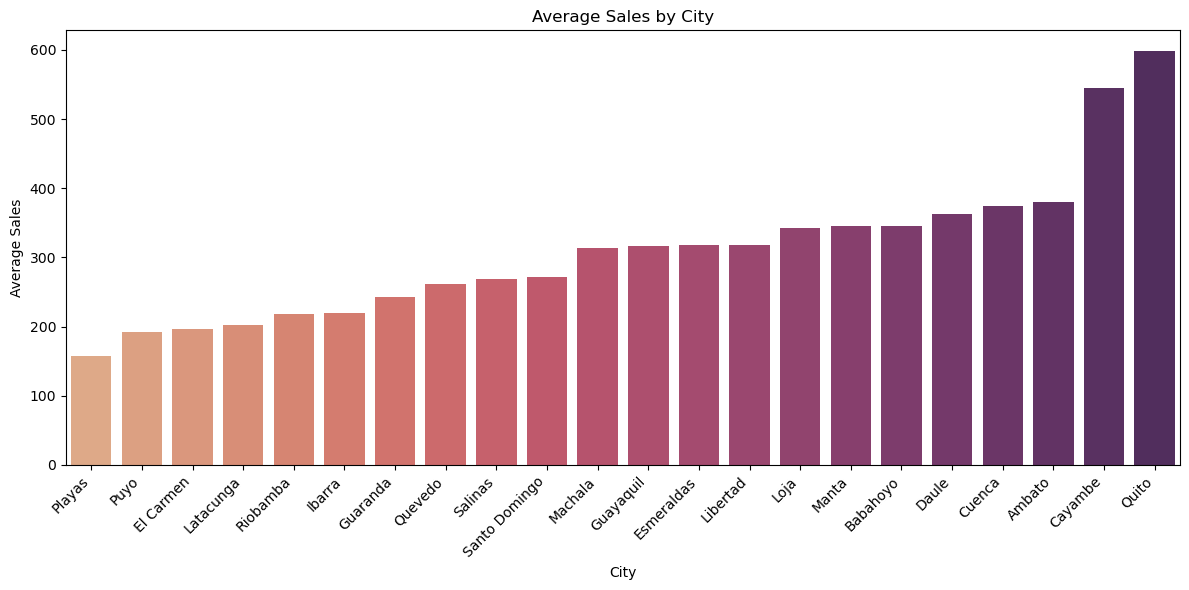

In [34]:
sales_by_city = merged_df.groupby('city')['sales'].mean()
average_sales_by_city = sales_by_city.sort_values(ascending=True)
flare_palette = sns.color_palette("flare", len(average_sales_by_city))

# Create a bar plot with each city having a different color from the "flare" palette
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_city.index, y=average_sales_by_city.values, palette=flare_palette)
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.title('Average Sales by City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Quito has the highest number of sales, Playas has the lowest number of sales.

#### Sales by state

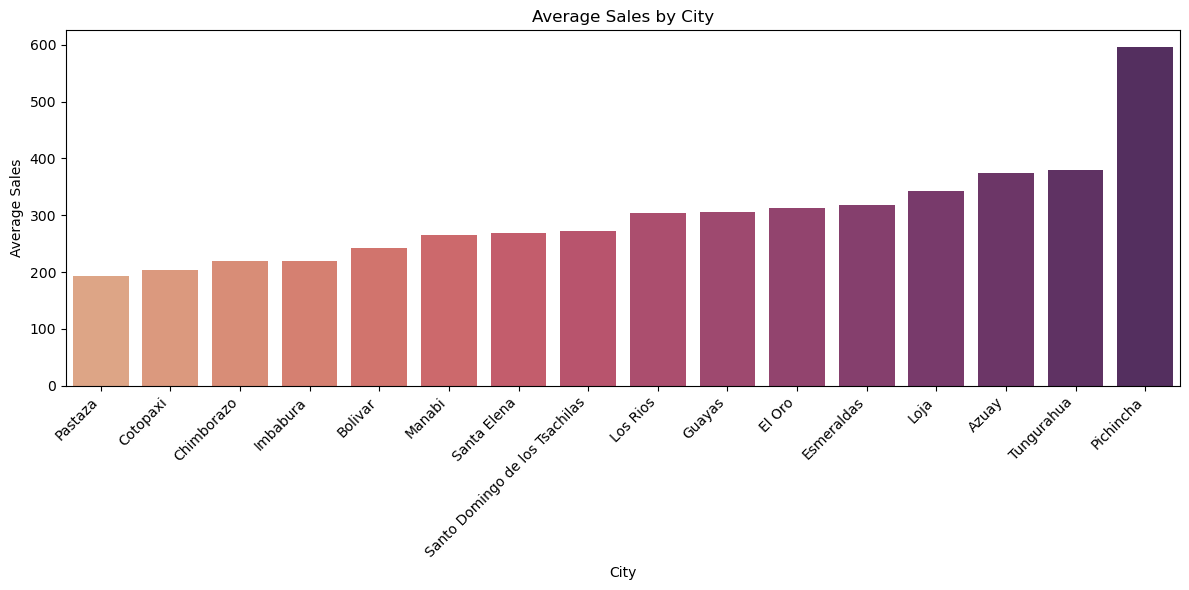

In [35]:
sales_by_city = merged_df.groupby('state')['sales'].mean()
average_sales_by_city = sales_by_city.sort_values(ascending=True)
flare_palette = sns.color_palette("flare", len(average_sales_by_city))

# Create a bar plot with each city having a different color from the "flare" palette
plt.figure(figsize=(12, 6))
sns.barplot(x=average_sales_by_city.index, y=average_sales_by_city.values, palette=flare_palette)
plt.xlabel('City')
plt.ylabel('Average Sales')
plt.title('Average Sales by City')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Pichincha has the highest number of sales( capital is quito), Pastaza have the lowest.

#### Relationship between sales and transactions.

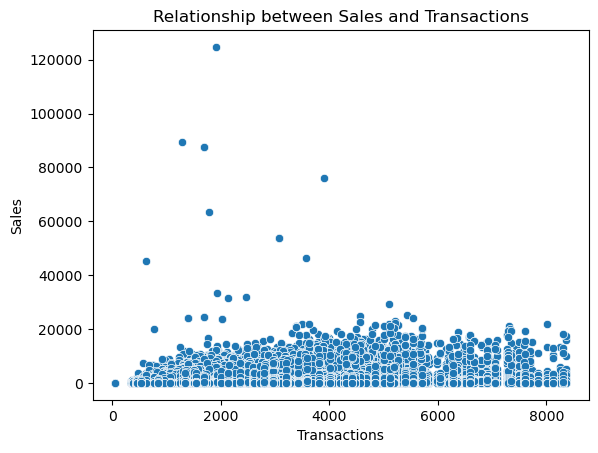

In [36]:
sns.scatterplot(x='transactions', y='sales', data=merged_df)
plt.xlabel('Transactions')
plt.ylabel('Sales')
plt.title('Relationship between Sales and Transactions')
plt.show()

The scatter plot to visualizes the relationship between sales and transactions in the dataset. The clustered datat point suggest the sales correspond to a certion transactions levels. Some outliers high sales volumes can be found at lower volume of transaction. This can be due to product they are selling, epecially groceries. 

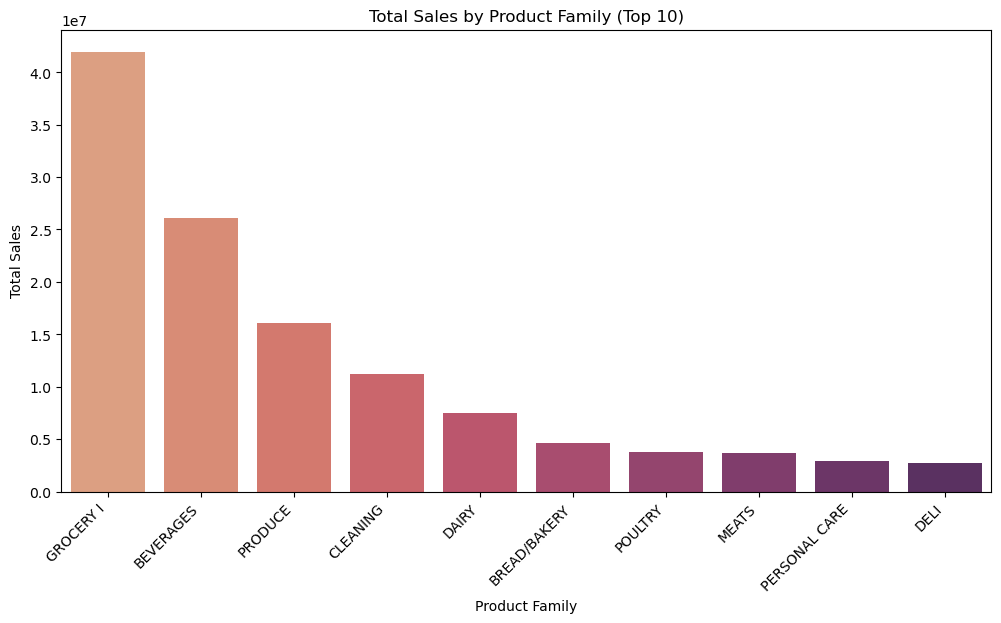

In [37]:
# Group the data by product family and calculate the total sales
family_sales = merged_df.groupby('family')['sales'].sum().sort_values(ascending=False)

# Select the top 10 product families
top_10_families = family_sales.head(10)

# Plot the relationship between product family and sales for the top 10 families
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_families.index, y=top_10_families.values, palette='flare')
plt.xlabel('Product Family')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Family (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.show()

Grocery I and beverages exhibit the highest sales.

### Multivariate 

#### Correlation matrix

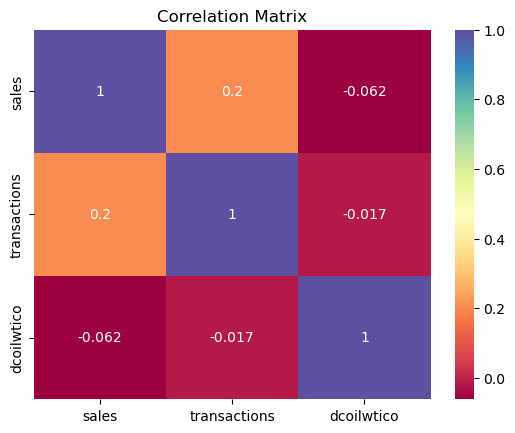

In [38]:
numerical_vars = ['sales', 'transactions', 'dcoilwtico']
corr_matrix = merged_df[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

Correlation matrix containing values range from -1 to 1, where -1 represents a perfect negative correlation, 1 represents a perfect positive correlation, and 0 represents no correlation. 

- 'sales' and 'transactions': Weak positive correlation, when transactions increases, sales to increase as well.
- 'sales' and 'dcoilwito': Weak negative correlation, when oil prices increase, sales to decrease, the correlation is not significant.
- 'transactions' and 'dcoilwito': Weaker negative correlation, than 'sales' and 'dcoilwito' correlation.No relationship between the two variables.

This indicates a low impact of variables on each other.

## Stationarity Test

A Stationary series is one whose statistical properties such as mean, variance, covariance, and standard deviation do not vary with time, or these stats properties are not a function of time. Once the seasonality and trend are removed, the series will be strictly stationary.

Augmented Dickey-Fuller (ADF) test is used to check for stationarity in a time series.

Null hypothesis that the data has a unit root, which means it’s not stationary.
The alternative hypothesis is that the data is stationary or trend-stationary.

ADF test gives you a test statistic, a p-value, and critical values at different significance levels. Low p-value means you reject the null hypothesis, that means the data is likely stationary.

In [39]:
sales_data = merged_df['sales']

# Perform ADF test
result = adfuller(sales_data)
print(f"ADF Test Statistics: {result[0]}")
print(f"P-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Check the p-value against a significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Data is stationary, null rejected..")
else:
    print("Data is non-stationary, alternative rejected.")

ADF Test Statistics: -36.646584085882886
P-value: 0.0
Critical Values:
   1%: -3.4303703113855613
   5%: -2.8615489773824025
   10%: -2.566774778334627
Data is stationary, null rejected..


Based on the ADF test, the test statistics (-36.64) is significantly lower than the critical values, p-value is  is lower than the significance level of 0.05.
We reject the null hypothesis,the data is stationary. 

### Promotions affect on sales

Null Hypothesis : The promotional activities have a significant impact on store sales.

Alternative Hypothesis : The promotional activities have a significant impact on store sales.

In [40]:
from scipy.stats import f_oneway 
#Analysis of Variance
promo_sales = merged_df[merged_df['onpromotion'] == 1]['sales']
non_promo_sales = merged_df[merged_df['onpromotion'] == 0]['sales']

t_statistic, p_value = f_oneway(promo_sales, non_promo_sales)
# Print the test result
print("Hypothesis Testing for Promotional Activities:")
print("Test Statistic:", t_statistic)
print("P-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")




Hypothesis Testing for Promotional Activities:
Test Statistic: 4653.537623152038
P-value: 0.0
Reject the null hypothesis.


Based on the hypothesis test, we obtained a very low p-value of 0.0, promotional activities have a significant impact on store sales.

### Other analysis

#### Day, month and year affect on sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322047 entries, 0 to 322046
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            322047 non-null  float64       
 1   date          322047 non-null  datetime64[ns]
 2   store_nbr     322047 non-null  float64       
 3   family        322047 non-null  object        
 4   sales         322047 non-null  float64       
 5   onpromotion   322047 non-null  float64       
 6   city          322047 non-null  object        
 7   state         322047 non-null  object        
 8   store_type    322047 non-null  object        
 9   cluster       322047 non-null  int64         
 10  transactions  322047 non-null  int64         
 11  holiday_type  322047 non-null  object        
 12  locale        322047 non-null  object        
 13  locale_name   322047 non-null  object        
 14  description   322047 non-null  object        
 15  transferred   322

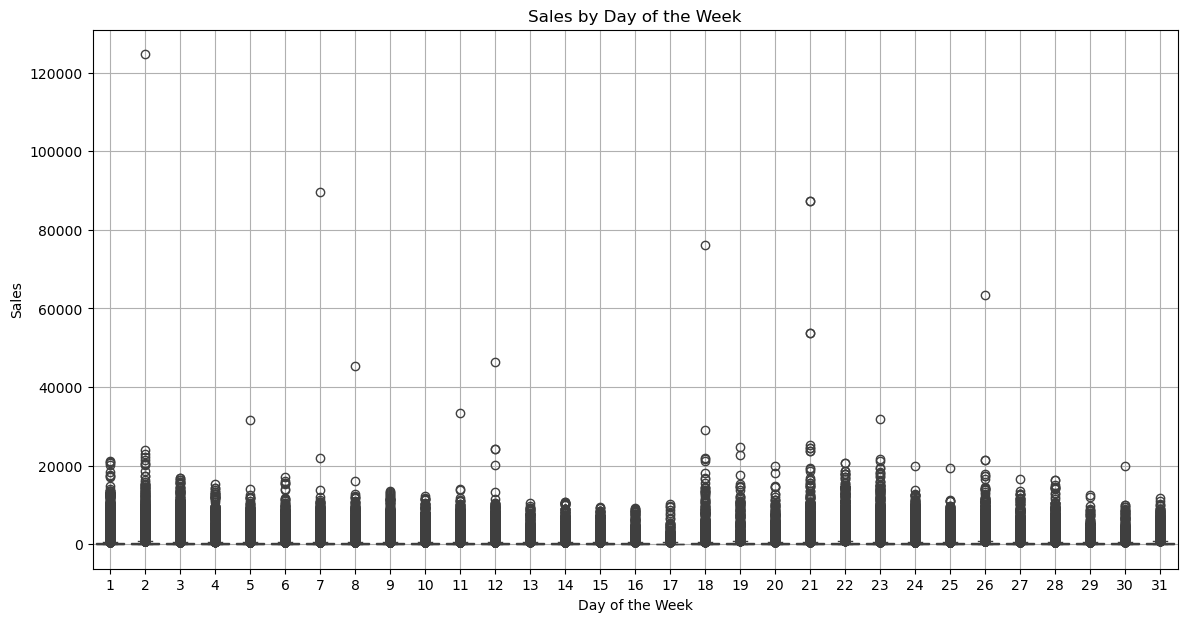

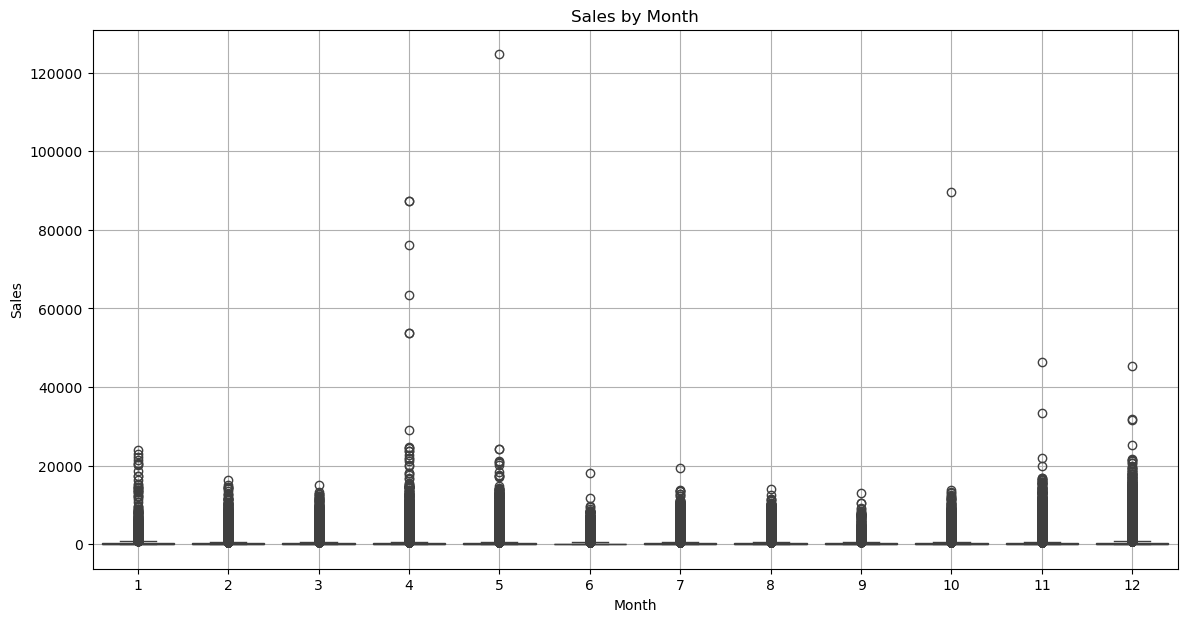

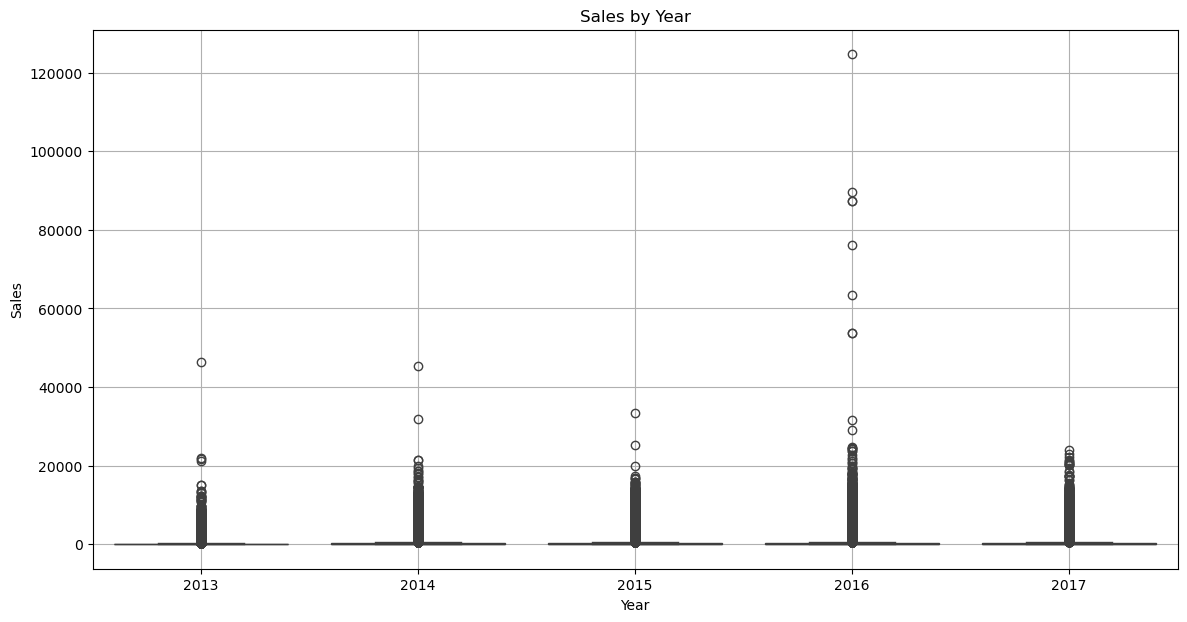

In [41]:
merged_df_copy = merged_df.copy()
merged_df_copy.info()
merged_df_copy['date'] = pd.to_datetime(merged_df_copy['date'])
merged_df_copy['year'] = merged_df_copy['date'].dt.year
merged_df_copy['month'] = merged_df_copy['date'].dt.month
merged_df_copy['day'] = merged_df_copy['date'].dt.day
merged_df_copy.head()
# Plot sales by day of the week

plt.figure(figsize=(14, 7))
sns.boxplot(x='day', y='sales', data=merged_df_copy)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Sales by Day of the Week')

# Plot sales by month
plt.figure(figsize=(14, 7))
sns.boxplot(x='month', y='sales', data=merged_df_copy)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Sales by Month')

# Plot sales by year
plt.figure(figsize=(14, 7))
sns.boxplot(x='year', y='sales', data=merged_df_copy)
plt.title('Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Sales by Year')


Few outliner can be observed. Lower sales from 7. till the 9. month. Higher sales avarage in 10. til the 12. month, which suggest that holiday , like Christmas have an afect on sales. 

#### Holiday effect on sales

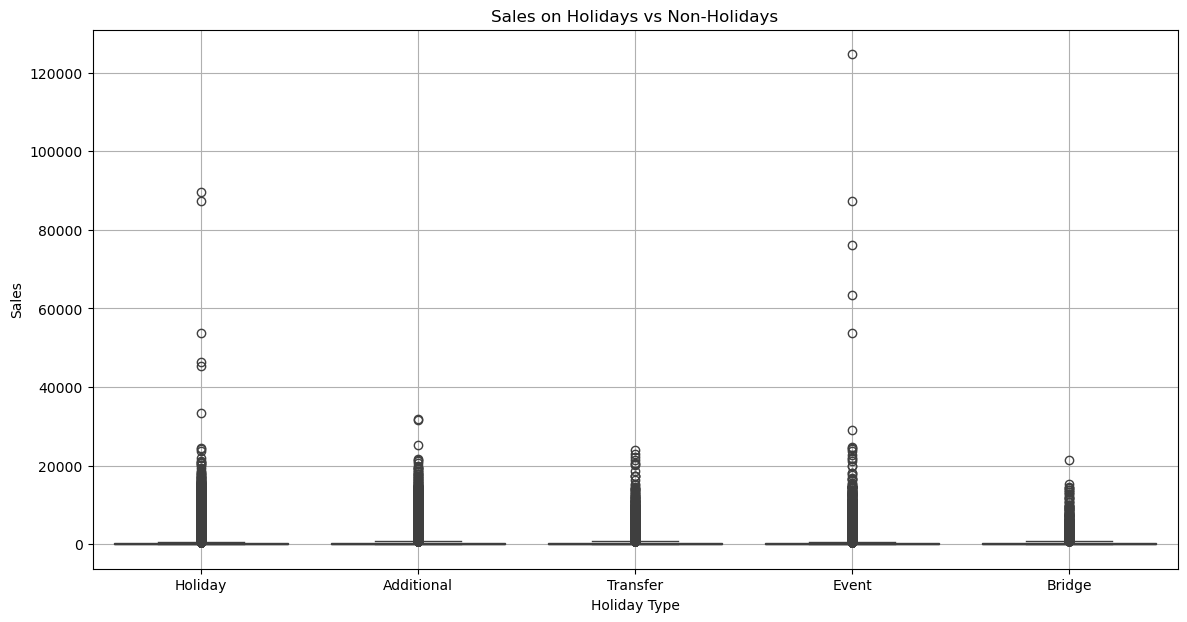

In [42]:
# Plot sales on holidays vs non-holidays
plt.figure(figsize=(14, 7))
sns.boxplot(x='holiday_type', y='sales', data=merged_df[merged_df['holiday_type'].notnull()])
plt.title('Sales on Holidays vs Non-Holidays')
plt.xlabel('Holiday Type')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('Sales on Holidays vs Non-Holidays')

#### Lowest and highest sales each year

In [43]:
lowest_sales_dates = merged_df_copy.groupby('year')['date'].min()
highest_sales_dates = merged_df_copy.groupby('year')['date'].max()

print("Dates with the lowest sales for each year:\n", lowest_sales_dates)
print("="*50)
print("Dates with the highest sales for each year:\n", highest_sales_dates)

Dates with the lowest sales for each year:
 year
2013   2013-01-01
2014   2014-01-01
2015   2015-01-01
2016   2016-02-08
2017   2017-01-02
Name: date, dtype: datetime64[ns]
Dates with the highest sales for each year:
 year
2013   2013-12-31
2014   2014-12-31
2015   2015-12-31
2016   2016-12-26
2017   2017-08-15
Name: date, dtype: datetime64[ns]


#### Sales by store cluster

In [44]:
by_cluster = merged_df.groupby('cluster')['sales'].mean()

# Calculate the average sales
by_city = merged_df.groupby('city')['sales'].mean()
by_state = merged_df.groupby('state')['sales'].mean()
by_store_type = merged_df.groupby('store_type')['sales'].mean()
num_bars = len(by_cluster)

flare_palette = sns.color_palette("flare", num_bars)

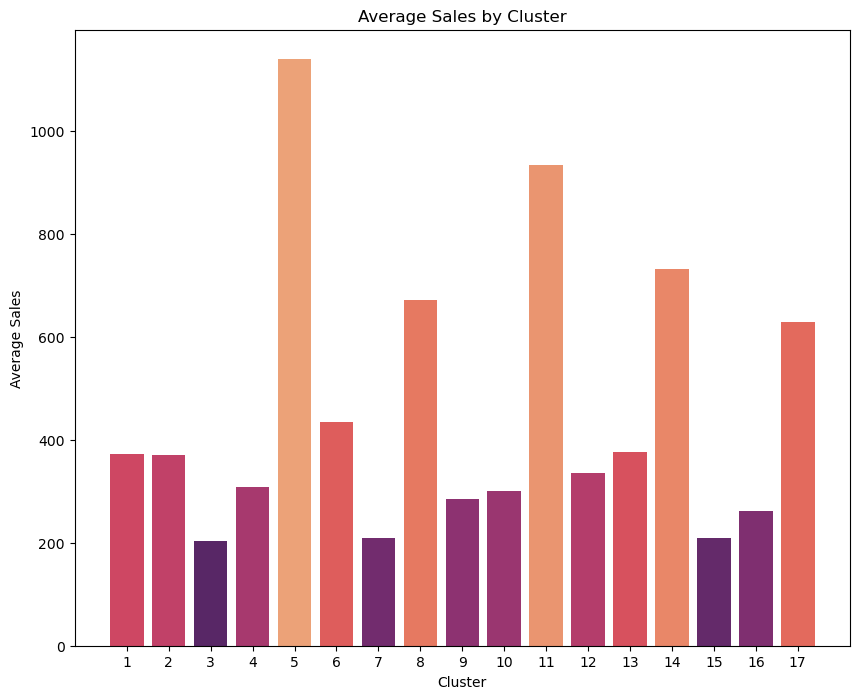

In [45]:
# Sort the data by average sales in descending order
by_cluster = by_cluster.sort_values(ascending=False)

# Plot the average sales by cluster
plt.figure(figsize=(10, 8))
plt.bar(by_cluster.index, by_cluster.values, color=flare_palette)
plt.xlabel('Cluster')
plt.ylabel('Average Sales')
plt.title('Average Sales by Cluster')

# Set the x-tick labels as integers
plt.xticks(range(1, len(by_cluster.index) + 1))
plt.show()

Cluster 5, 11, 14, 8, 17 have the highest number of stores.

#### Promotions, oil prices and holidays affect on sales

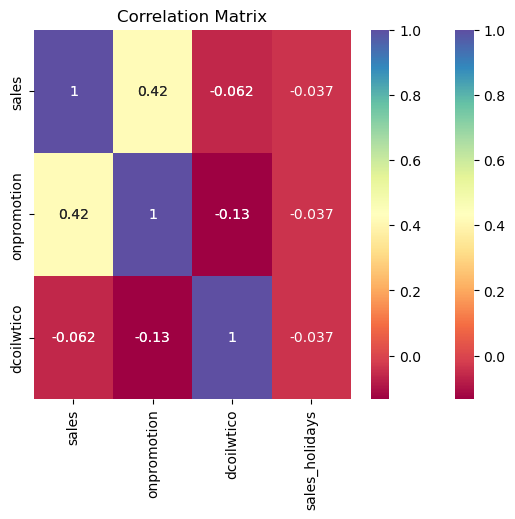

Correlation between Sales and Promotions: 0.41802891972423856
Correlation between Sales and Oil Prices: -0.0615091523708098
Correlation between Sales and Holidays: -0.03706892930251654


In [46]:
# Calculate correlations between sales and promotions, oil prices, holidays
corr_sales_promotions = merged_df['sales'].corr(merged_df['onpromotion'])
corr_sales_oil = merged_df['sales'].corr(merged_df['dcoilwtico'])
corr_sales_holidays = merged_df['sales'].corr(merged_df['holiday_type'] == 'Holiday')

numerical_vars = ['sales', 'onpromotion', 'dcoilwtico',]
corr_matrix = merged_df[numerical_vars].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Spectral')
corr_sales_holidays = merged_df['sales'].corr(merged_df['holiday_type'] == 'Holiday')
corr_matrix['sales_holidays'] = corr_sales_holidays
sns.heatmap(corr_matrix,annot=True ,cmap='Spectral')
plt.title('Correlation Matrix')
plt.show()

print(f"Correlation between Sales and Promotions: {corr_sales_promotions}")
print(f"Correlation between Sales and Oil Prices: {corr_sales_oil}")
print(f"Correlation between Sales and Holidays: {corr_sales_holidays}")

Promotions have a moderate positive correlation with sales. --> Highest inpact on sales!

Weak negative correlation between oil prices and sale as it wwas earlier conducted too.

Very weak negative correlation between sales and holidays. 

# Feature Enginering

## Train Dataset

### Extracting Date Components (Day, Month, Year and Day of The Week).

In [47]:
# Extracting Date Components
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month
merged_df['day'] = merged_df['date'].dt.day
merged_df_copy.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,holiday_type,locale,locale_name,description,transferred,dcoilwtico,year,month,day
0,581.0,2013-01-01,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
1,580.0,2013-01-01,25.0,LADIESWEAR,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
2,579.0,2013-01-01,25.0,HOME CARE,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
3,578.0,2013-01-01,25.0,HOME APPLIANCES,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1
4,577.0,2013-01-01,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,Santa Elena,D,1,770,Holiday,National,Ecuador,Primer dia del ano,False,93.14,2013,1,1


### Dropping Unneccessary Columns in The Merged and Test Datasets as it is not needed for our analysis

In [48]:
columns_to_drop = ['date','id', 'locale', 'locale_name', 'description', 'store_type', 'transferred', 'state'] #remove date since we have seperated into 3 columns
merged_df_copy = merged_df_copy.drop(columns=columns_to_drop)

merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day
0,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
1,25.0,LADIESWEAR,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
2,25.0,HOME CARE,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
3,25.0,HOME APPLIANCES,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
4,25.0,HOME AND KITCHEN II,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1


### Product Categorization Based on Families

Since we saw that Product families affect sales, since fresh goods are sld in higher frequency wee nedd to represent it in the dataset!

In [49]:
unique_families = merged_df_copy['family'].unique()
unique_families

array(['LAWN AND GARDEN', 'LADIESWEAR', 'HOME CARE', 'HOME APPLIANCES',
       'HOME AND KITCHEN II', 'HOME AND KITCHEN I', 'HARDWARE',
       'GROCERY II', 'GROCERY I', 'FROZEN FOODS', 'EGGS', 'LINGERIE',
       'DELI', 'CLEANING', 'CELEBRATION', 'BREAD/BAKERY', 'BOOKS',
       'BEVERAGES', 'BEAUTY', 'BABY CARE', 'AUTOMOTIVE', 'DAIRY',
       'LIQUOR,WINE,BEER', 'MEATS', 'MAGAZINES', 'SEAFOOD',
       'SCHOOL AND OFFICE SUPPLIES', 'PRODUCE', 'PREPARED FOODS',
       'POULTRY', 'PLAYERS AND ELECTRONICS', 'PET SUPPLIES',
       'PERSONAL CARE'], dtype=object)

In [50]:
# Define the category lists for each product category
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI','PRODUCE', 'DAIRY','POULTRY','EGGS','SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES','SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE','PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS','HARDWARE']

# Categorize the 'family' column based on the product categories
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(food_families), 'FOODS', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(home_families), 'HOME', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(clothing_families), 'CLOTHING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(grocery_families), 'GROCERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(stationery_families), 'STATIONERY', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(cleaning_families), 'CLEANING', merged_df_copy['family'])
merged_df_copy['family'] = np.where(merged_df_copy['family'].isin(hardware_families), 'HARDWARE', merged_df_copy['family'])

# Print the updated DataFrame
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day
0,25.0,LAWN AND GARDEN,2.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
1,25.0,LADIESWEAR,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
2,25.0,CLEANING,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
3,25.0,HOME,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1
4,25.0,HOME,0.0,0.0,Salinas,1,770,Holiday,93.14,2013,1,1


### Feature Scaling

In [51]:
# Scaling Numeric Variables (Min-Max Scaling)
# create an instance of StandardScaler
scaler = StandardScaler()

# select numerical columns
num_cols = ['sales', 'transactions', 'dcoilwtico']

# fit and transform the numerical columns
merged_df_copy[num_cols] = scaler.fit_transform(merged_df_copy[num_cols])

# Display the updated dataframe
merged_df_copy.head()

,store_nbr,family,sales,onpromotion,city,cluster,transactions,holiday_type,dcoilwtico,year,month,day
0,25.0,LAWN AND GARDEN,-0.324316,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1
1,25.0,LADIESWEAR,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1
2,25.0,CLEANING,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1
3,25.0,HOME,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1
4,25.0,HOME,-0.325920,0.0,Salinas,1,-0.917916,Holiday,1.186995,2013,1,1


### Encoding The Categorical Variables

In [52]:
# Define the categorical columns to encode
categorical_columns = ["family", "city", "holiday_type"]

# Perform one-hot encoding
encoder = OneHotEncoder()
one_hot_encoded_data = encoder.fit_transform(merged_df_copy[categorical_columns])

# Create column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Convert the one-hot encoded data to a DataFrame
merged_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original dataframe with the one-hot encoded data
merged_df_encoded = pd.concat([merged_df_copy, merged_df_encoded], axis=1)

# Drop the original categorical columns
merged_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Print the head of the encoded DataFrame
merged_df_encoded.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,family_AUTOMOTIVE,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
0,25.0,-0.324316,0.0,1,-0.917916,1.186995,2013,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,25.0,-0.325920,0.0,1,-0.917916,1.186995,2013,1,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Test_df

In [53]:
# Extracting Date Components
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [54]:
test_df.head()

,id,date,store_nbr,family,onpromotion,year,month,day
0,3000888,2017-08-16,1,AUTOMOTIVE,0,2017,8,16
1,3000889,2017-08-16,1,BABY CARE,0,2017,8,16
2,3000890,2017-08-16,1,BEAUTY,2,2017,8,16
3,3000891,2017-08-16,1,BEVERAGES,20,2017,8,16
4,3000892,2017-08-16,1,BOOKS,0,2017,8,16


In [55]:
# Dropping Unnecessary Columns
columns_to_drop = ['date', 'id']
test_df = test_df.drop(columns=columns_to_drop)
test_df.head()

,store_nbr,family,onpromotion,year,month,day
0,1,AUTOMOTIVE,0,2017,8,16
1,1,BABY CARE,0,2017,8,16
2,1,BEAUTY,2,2017,8,16
3,1,BEVERAGES,20,2017,8,16
4,1,BOOKS,0,2017,8,16


In [56]:
# Product Categorization Based on Families
food_families = ['BEVERAGES', 'BREAD/BAKERY', 'FROZEN FOODS', 'MEATS', 'PREPARED FOODS', 'DELI', 'PRODUCE', 'DAIRY', 'POULTRY', 'EGGS', 'SEAFOOD']
home_families = ['HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES']
clothing_families = ['LINGERIE', 'LADYSWARE']
grocery_families = ['GROCERY I', 'GROCERY II']
stationery_families = ['BOOKS', 'MAGAZINES', 'SCHOOL AND OFFICE SUPPLIES']
cleaning_families = ['HOME CARE', 'BABY CARE', 'PERSONAL CARE']
hardware_families = ['PLAYERS AND ELECTRONICS', 'HARDWARE']

test_df['family'] = np.where(test_df['family'].isin(food_families), 'FOODS', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(home_families), 'HOME', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(clothing_families), 'CLOTHING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(grocery_families), 'GROCERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(stationery_families), 'STATIONERY', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(cleaning_families), 'CLEANING', test_df['family'])
test_df['family'] = np.where(test_df['family'].isin(hardware_families), 'HARDWARE', test_df['family'])


In [57]:
# Encoding The Categorical Variables
# List of categorical columns to encode
categorical_columns = ["family"]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Perform one-hot encoding on the 'test_df' data for the specified categorical columns
one_hot_encoded_data = encoder.fit_transform(test_df[categorical_columns])

# Get the column names for the one-hot encoded data
column_names = encoder.get_feature_names_out(categorical_columns)

# Create a DataFrame with the one-hot encoded data and corresponding column names
test_df_encoded = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

# Concatenate the original 'test_df' with the one-hot encoded data
test_df_encoded = pd.concat([test_df, test_df_encoded], axis=1)

# Drop the original categorical columns since they have been encoded
test_df_encoded.drop(categorical_columns, axis=1, inplace=True)

# Display the updated 'test_df_encoded' DataFrame
test_df_encoded.head()

,store_nbr,onpromotion,year,month,day,family_AUTOMOTIVE,family_BEAUTY,family_CELEBRATION,family_CLEANING,family_CLOTHING,family_FOODS,family_GROCERY,family_HARDWARE,family_HOME,family_LADIESWEAR,family_LAWN AND GARDEN,"family_LIQUOR,WINE,BEER",family_PET SUPPLIES,family_STATIONERY
0,1,0,2017,8,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,2017,8,16,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,2017,8,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,20,2017,8,16,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,2017,8,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Modeling

## Data Splitting

In [58]:
train_set = merged_df_encoded.loc[merged_df_encoded['year'].isin([2013, 2014, 2015, 2016])]
eval_set = merged_df_encoded.loc[merged_df_encoded['year'] == 2017]
train_set.shape
eval_set.head()
eval_set.shape
eval_set.head()

,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,year,month,day,family_AUTOMOTIVE,...,city_Quevedo,city_Quito,city_Riobamba,city_Salinas,city_Santo Domingo,holiday_type_Additional,holiday_type_Bridge,holiday_type_Event,holiday_type_Holiday,holiday_type_Transfer
284889,41.0,-0.315494,0.0,4,-0.299065,-0.453674,2017,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284890,42.0,-0.321910,0.0,2,-0.220042,-0.453674,2017,1,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284891,42.0,-0.325920,0.0,2,-0.220042,-0.453674,2017,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284892,42.0,-0.315494,1.0,2,-0.220042,-0.453674,2017,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
284893,42.0,1.258034,21.0,2,-0.220042,-0.453674,2017,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
# Separate the target variable and features for training and testing
X_train = train_set.drop('sales', axis=1)
y_train = train_set['sales'] 

X_eval = eval_set.drop('sales', axis=1)  
y_eval = eval_set['sales']

model_results_df = pd.DataFrame(columns=['Model', 'RMSLE', 'RMSE', 'MSE', 'MAE'])

## Model 1. XGBoost

In [60]:

# XGBoost Model Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42)
random_search_xgb = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train, y_train)
best_xgb_model = random_search_xgb.best_estimator_

# Make predictions using the best XGBoost model
best_xgb_predictions = best_xgb_model.predict(X_eval)
best_xgb_mse = mean_squared_error(y_eval, best_xgb_predictions)
best_xgb_mae = mean_absolute_error(y_eval, best_xgb_predictions)
y_eval_abs = abs(y_eval)
best_xgb_predictions_abs = abs(best_xgb_predictions)
best_xgb_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, best_xgb_predictions_abs))

# Store XGBoost results
results_xgb = pd.DataFrame({'Model': ['XGBoost'],
                            'RMSLE': [best_xgb_rmsle],
                            'RMSE': [np.sqrt(best_xgb_mse)],
                            'MSE': [best_xgb_mse],
                            'MAE': [best_xgb_mae]}).round(2)
#model_results_df = pd.concat([model_results_df, results_xgb], ignore_index=True)
results_xgb

,Model,RMSLE,RMSE,MSE,MAE
0,XGBoost,0.23,0.67,0.45,0.26


## Model 2. LTSM

In [ ]:
# Reshaping Input Data for LSTM Model
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_eval_lstm = X_eval.values.reshape(X_eval.shape[0], X_eval.shape[1], 1)

def create_lstm_model(neurons=50):
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Set fixed parameters for LSTM
neurons = 50
batch_size = 64
epochs = 100

# Create and fit LSTM model
lstm_model = create_lstm_model(neurons)
lstm_model.fit(X_train_lstm, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

# Evaluate LSTM model
eval_predictions = lstm_model.predict(X_eval_lstm)
eval_predictions = eval_predictions.flatten()

# Calculate metrics
lstm_mse = mean_squared_error(y_eval, eval_predictions)
lstm_mae = mean_absolute_error(y_eval, eval_predictions)
eval_abs = abs(y_eval)
eval_predictions_abs = abs(eval_predictions)
lstm_rmsle = np.sqrt(mean_squared_log_error(eval_abs, eval_predictions_abs))

# Store LSTM results
results_lstm = pd.DataFrame({
    'Model': ['LSTM'],
    'RMSLE': [lstm_rmsle],
    'RMSE': [np.sqrt(lstm_mse)],
    'MSE': [lstm_mse],
    'MAE': [lstm_mae]
}).round(2)

results_lstm

## Model 3. ARIMA

In [61]:
# ARIMA Model
# d and q are equal to zero as data is already stationary
p = 1
d = 0 
q = 0  

# Create an instance of the ARIMA model
arima_model = ARIMA(y_train, order=(p, d, q))

# Fit the model to the training data
arima_model_fit = arima_model.fit()

# Make predictions on the evaluation data
arima_predictions = arima_model_fit.predict(start=len(y_train), end=len(y_train) + len(X_eval) - 1)

# Calculate evaluation metrics
arima_mse = mean_squared_error(y_eval, arima_predictions)
arima_rmse = np.sqrt(arima_mse)

# Apply the absolute value function to y_eval to remove negative signs
y_eval_abs = abs(y_eval)
arima_predictions_abs = abs(arima_predictions)

# Calculate the Mean Absolute Error (MAE)
arima_mae = mean_absolute_error(y_eval, arima_predictions)

# Calculate the Root Mean Squared Logarithmic Error (RMSLE)
arima_rmsle = np.sqrt(mean_squared_log_error(y_eval_abs, arima_predictions_abs))

# Create a DataFrame to store results for ARIMA
results_arima = pd.DataFrame({'Model': ['ARIMA'],
                            'RMSLE': [arima_rmsle],
                            'RMSE': [np.sqrt(arima_mse)],
                            'MSE': [arima_mse],
                            'MAE': [arima_mae]}).round(2)

# Print the results_arima dataframe
results_arima

,Model,RMSLE,RMSE,MSE,MAE
0,ARIMA,0.45,1.09,1.19,0.5


## Model 4. SARIMA

In [62]:
# Set the order and seasonal order parameters
# Seasonal autoregressive order
P = 0  
# Seasonal differencing order
D = 0  
# Seasonal moving average order
Q = 0  
# Number of time steps in each season (chosen based on the number of months each year)
s = 12  

# Create an instance of the SARIMA model
sarima_model = SARIMAX(endog=y_train, exog=X_train, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model to the training data
sarima_fit = sarima_model.fit()

# Make predictions on the evaluation data
sarima_predictions = sarima_fit.forecast(steps=len(y_eval), exog=X_eval)

# Calculate metrics
sarima_mse = mean_squared_error(y_eval, sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)
sarima_mae = mean_absolute_error(y_eval, sarima_predictions)
sarima_rmsle = np.sqrt(mean_squared_error(np.log1p(y_eval), np.log1p(sarima_predictions)))

# Create a DataFrame to store results for SARIMA
results_sarima = pd.DataFrame({'Model': ['SARIMA'],
                                'RMSLE': [sarima_rmsle],
                                'RMSE': [sarima_rmse],
                                'MSE': [sarima_mse],
                                'MAE': [sarima_mae]}).round(2)

# Print the results_sarima dataframe
results_sarima

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           51     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22235D+00    |proj g|=  2.77928D+01


 This problem is unconstrained.


In [ ]:
# Append all results to the results dataframe
results_list = [ results_xgb, results_lstm, results_arima, results_sarima]
results_df = pd.concat(results_list, ignore_index=True)

# Sort the results_df based on RMSE in ascending order
results_df = results_df.sort_values(by='RMSLE', ascending=True)

# Reset the index of the DataFrame
results_df = results_df.reset_index(drop=True)

# Print the Final Results dataframe
results_df

- The RMSLE is a metric used when the target variable has a wide range of values. A lower RMSLE indicates a better model fit. 
- The RMSE measures the average magnitude of the errors between predicted and actual values. A lower RMSE indicates better model performance. 
- The MSE is the average of the squared errors and provides a measure of the model's overall accuracy. A lower MSE indicates better performance.
- The MAE measures the average magnitude of the errors without considering their direction. A lower MAE indicates better model accuracy. 

The RMSLE and RMSE represent the model's prediction error, with lower values indicating better performance. The MSE provides a measure of the squared error between predicted and actual values, while the MAE measures the average absolute difference between predictions and actuals.

These results indicate the performance of each model in terms of different metrics. Lower values of RMSLE, RMSE, MSE, and MAE indicate better model performance. Based on these results, the Random Forest and Gradient Boosting models appear to perform better than the Linear Regression, ARIMA, and SARIMA models in terms of the provided metrics.


## Saving the Best Model! 

In [ ]:
# Define the key components
key_components = {
    'model': best_rf_model, 
    'best_params': best_rf_params,
    'best_score': best_rf_rmsle
}

# Save the key components in a file using pickle
with open('best_rf_model_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)